# Lecture 8: Symmetric eigenvalue problem and SVD

## Recap of the previous lecture
- QR decomposition and Gram-Schmidt algorithm
- Schur decomposition and QR-algorithm (basic)

## Today's lecture

Today we will talk about:

- Algorithms for the symmetric eigenvalue problems
    - QR algorithm (in more details)
    - Divide-and-Conquer
    - bisection
- Algorithms for SVD computation

<font color="green"> **Try to start with this** http://pi.math.cornell.edu/~web6140/TopTenAlgorithms/QRalgorithm.html .</font> It may bring the different view on the QR algorithm
Other auxiliary materials:
<a id="auxiliary"></a>
1. Rayleigh Quotient, Inverse Iteration
http://www.cs.cmu.edu/afs/cs/academic/class/15859n-f16/Handouts/TrefethenBau/RayleighQuotient-27.pdf
1. Other Eigenvalue Algorithms 
http://www.cs.cmu.edu/afs/cs/academic/class/15859n-f16/Handouts/TrefethenBau/EigenAlgorithms-30.pdf

## Schur form computation

Recall that we are trying to avoid $\mathcal{O}(n^4)$ complexity. The idea is to make a matrix have a simpler structure so that each step of QR algorithm becomes cheaper.

In case of a general matrix we can use the **Hessenberg form**.

## Hessenberg form

The matrix $A$ is said to be in the Hessenberg form, if

$$a_{ij} = 0, \quad \mbox{if } i \geq j+2.$$

$$H = \begin{bmatrix} * & * & * & * & * \\ * & * & * & * & * \\ 0 & * & * & * & *\\ 0 & 0 & * & * & *\\ 0 & 0 & 0 & * & * \\ \end{bmatrix}.$$

## Reduction any matrix to Hessenberg form

By applying Householder reflections we can reduce any matrix to the Hessenberg form

$$U^* A U = H$$

The only difference with Schur decomposition is that we have to map the first column to the vector with two non-zeros, and the first element is not changed.

The computational cost of such reduction is $\mathcal{O}(n^3)$ operations.

In a Hessenberg form, computation of one iteration of the QR algorithm costs $\mathcal{O}(n^2)$ operations (e.g. using Givens rotations, how? *- each Givens rotation costs $O(n)$ elmentary operations, since the procedure itself is a multiplication by almost diagonal matrix, where only two off-diagonal entries are non-zero. There are $O(n)$ elements in Hessenberg form to be zeroed, so, in total it takes $O(n^2)$ operations*), and the Hessenberg form is preserved by the QR iteration (check why).

*My proof of "QR preserves Hessenberg form"*  
$\square$
$$
    H = QR\\
    H' = RQ\\
    Q = HR^{-1} \quad\rightarrow\quad H' = RHR^{-1}
$$
*$R$ is upper-triangular and $R^{-1}$ is upper-triangular (check the latter in lecture 5)*

*The product of an upper triangular and a Hessenberg matrices has the Hessenberg form (in any order):*  
$$
    i \gt j + 1: \quad (RH)_{ij} = \left(\sum_{k \le j + 1} + \sum_{j + 1 \lt k \le i} + \sum_{k \gt i}\right)R_{ik}H_{kj} = \\
    \sum_{k \le j + 1} 0\cdot H_{kj} + \sum_{j + 1 \lt k \le i} 0\cdot 0 \;\; + \sum_{k \gt i}R_{ik}\cdot 0 = 0
$$
*I didn't check whether it has zeros even more, on its diagonal, (thus $HR$ is diagonal) or not. Even if it is, upper-triangular matrix is Hessenberg as well, it is just a special case of the Hessenberg form $\quad\blacksquare$*

## Symmetric (Hermitian) case

- In the symmetric case, we have $A = A^*$, then $H = H^*$ and the upper Hessenberg form becomes tridiagonal matrix.

- From now on we will talk about the case of symmetric tridiagonal form.

- Any symmetric (Hermitian) matrix can be reduced to the tridiagonal form by Householder reflections.

- Key point is that tridiagonal form is preserved by the QR algorithm, and the cost of one step can be reduced to $\mathcal{O}(n)$!

## QR algorithm: iterations

The iterations of the QR algorithm have the following form:

$$A_k = Q_k R_k, \quad A_{k+1} = R_k Q_k.$$

If $A_0 = A$ is <font color='red'> tridiagonal symmetric matrix </font>, this form is preserved by the QR algorithm.  
*(To prove that one may do it in the way we did it before: consider the product of tridiagonal and upper-triangular matrix to convince that it is tridiagonal)*  
*Symmetry is shown below (here different notions are used $K$ and $H$ are $A_{k+1}$ and $A_k$ respectively*  
<img src="./pics/small_proof_lec8.png" width=70%>
Let us see..

array([1.2494975 , 1.96572771, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

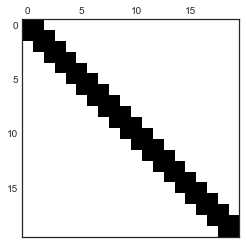

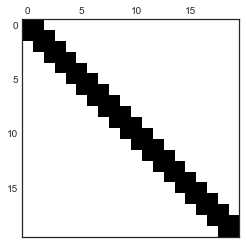

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
#Generate a random tridiagonal matrix

n = 20
d = np.random.randn(n)
sub_diag = np.random.randn(n-1)

mat = np.diag(d) + np.diag(sub_diag, -1) + np.diag(sub_diag, 1)
mat1 = np.abs(mat)
mat1 = mat1/np.max(mat1.flatten())
plt.spy(mat)
q, r = np.linalg.qr(mat)
plt.figure()
b = r.dot(q)
b[abs(b) <= 1e-12] = 0
plt.spy(b)
#plt.figure()
#plt.imshow(np.abs(r.dot(q)))
b[0, :]

## Tridiagonal form
In the tridiagonal form, you do not have to compute the $Q$ matrix: you only have to compute the **triadiagonal part**
that appears after the iterations 

$$A_k = Q_k R_k, \quad A_{k+1}  = R_k Q_k,$$

in the case when $A_k = A^*_k$ and is also tridiagonal.

<img src="./pics/qr_prac_example.png" width=50%>

Such matrix is defined by $\mathcal{O}(n)$ parameters; computation of the QR is more complicated, since we also have to compute the product of Givens matrices $G_n\ldots G_2 = Q_k$
but as we see it is possible to compute $A_{k+1}$ ($\tilde{A}$ in the photo) directly.

This is called **implicit QR-step**.

## Shifts and power method

Remember the power method for the computation of the eigenvalues.

$$x_{k+1} := A x_k, \quad x_{k+1} := \frac{x_{k+1}}{\Vert x_{k+1} \Vert}.$$

It converges to the eigenvector corresponding to the largest eigenvalue in modulus. 

The convergence can be very slow.

Let us try to use shifting strategy. If we shift the matrix as 

$$  A := A - \lambda_k I.$$

and the corresponding eigenvalue becomes small (but we need large:*if we are looking for $k$-th eigenvalue and its eigenvector we need to make it bigger than all the other eigenvalues*). That is not what we wanted.

## Inverse iteration and Rayleigh quotient iteration

To make a small eigenvalue large, we need to **invert the matrix**, and that gives us **inverse iteration**

$$x_{k+1} = (A - \lambda I)^{-1} x_k,$$

where $\lambda$ is the shift which is approximation to the eigenvalue that we want. As it was for the power method, the convegence is linear.

To accelerate convergence one can use the **Rayleigh quotient iteration** (inverse iteration with adaptive shifts) which is given by the selection of the **adaptive shift**:

$$x_{k+1} = (A - \lambda_k I)^{-1} x_k,$$
$$\lambda_k = \frac{(Ax_k, x_k)}{(x_k, x_k)}$$

In the symmetric case $A = A^*$ the convergence is **locally cubic** and **locally quadratic** otherwise.

## Singular values and eigenvalues (1)

Now let us talk about singular values and eigenvalues. 

SVD: $$A = U \Sigma V^*$$

exists for any matrix.

It can be also viewed as a reduction of a given matrix to the diagonal form by means of 

two-sided unitary transformations:

$$\Sigma = U^* A V.$$

By two-sided Householder transformation we can reduce any matrix to the **bidiagonal form** $B$.

## Singular values and eigenvalues (2)

**Implicit QR-algorithm** (with shifts) gives the way of computing the eigenvalues (and Schur form).
But we cannot apply QR algorithm directly to the bidiagonal matrix, as it is not diagonalizable in general case.

However, the problem of the computation of the SVD can be reduced to the **symmetric eigenvalue problem** in two ways:

1. Work with the tridiagonal matrix 

$$T = B^* B$$ 

2. Work with the extended matrix $$T = \begin{bmatrix} 0 & B \\ B^* & 0 \end{bmatrix}$$

*It is easy to see that in both cases $T^* = T$. Thus for both $T^*T = TT^*$ so T is normal and, hence, diagonalizable.*



The case 1 is OK if you **do not form T directly**!

Thus, the problem of computing singular values can be reduced to the problem of the computation of the eigenvalues of symmetric tridiagonal matrix.

## Algorithms for the SEV  (symmetric eigenvalue problem)

Done:
- QR algorithm: the "gold standard" of the eigenvalue computations
- RQI-iteration: Rayleigh quotient iteration is implicitly performed at each step of the QR algorithm

Next slides:
- Divide-and-conquer: the fastest (?) nowdays
- Bisection method
- Jacobi method

## Divide-and-conquer

Suppose we have a tridiagonal matrix, and we split it into two blocks:


$$T = \begin{bmatrix} T'_1 & B \\ B^{\top} & T'_2 \end{bmatrix}$$

*Here $B = \begin{bmatrix} 0 & b_m \\ O & 0 \end{bmatrix}$*

We can write the matrix $T$ as

$$T = \begin{bmatrix} T_1 & 0 \\ 0 & T_2 \end{bmatrix} + b_m v v^*$$

where $vv^*$ is rank 1 matrix, $v = (0,\dots,0,1,1,0,\dots,0)^T$.

*So,* $b_mvv^* = \begin{matrix}
             & \begin{matrix} 
             & & \tiny{m} & \tiny{m+1} & &
             \end{matrix} &\\
              & \begin{bmatrix} 
                & &\vdots&\vdots& &\\
                \ldots& & b_m & b_m & &\ldots\\ 
                \ldots& & b_m & b_m & &\ldots\\ 
                & & \vdots&\vdots& & 
            \end{bmatrix} & {\tiny{m}\\ \tiny{m+1}}
            \end{matrix}$   

Suppose we have decomposed $T_1$ and $T_2$ already:

$$T_1 = Q_1 \Lambda_1 Q^*_1, \quad T_2 = Q_2 \Lambda_2 Q^*_2$$

Then (check),

*Imposed notions: $\mathbf{q_{1_m}}$ - $m$-th column vector of $Q_1$  
                  $\;\;\quad\qquad\qquad\mathbf{q_{2_1}^*}$ - 1st row-vector of $Q_2$*

$$\begin{bmatrix} Q^*_1 & 0 \\ 0 & Q^*_2 \end{bmatrix} T\begin{bmatrix} Q_1 & 0 \\ 0 & Q_2 \end{bmatrix} = D + \rho u u^{*}, \quad D = \begin{bmatrix} \Lambda_1 & 0 \\ 0 & \Lambda_2\end{bmatrix}$$

$$
\begin{bmatrix} 
    Q^*_1 & 0 \\ 
    0 & Q^*_2 
\end{bmatrix} 
\left(\begin{bmatrix} T_1 & 0 \\ 
                       0 & T_2 \end{bmatrix} + b_m v v^*)\right)
\begin{bmatrix} 
    Q_1 & 0 \\ 
    0 & Q_2 
\end{bmatrix} = \\
\begin{bmatrix} 
    Q^*_1T_1 & 0 \\ 
    0 & Q^*_2T_2 
\end{bmatrix} 
\begin{bmatrix} 
    Q_1 & 0 \\ 
    0 & Q_2 
\end{bmatrix}
+
\begin{bmatrix} 
    &\vdots &b_m\mathbf{q_{1_m}}&b_m\mathbf{q_{1_m}}&\vdots \\
    \ldots & & & & &\ldots\\
    &\vdots & b_m\mathbf{q_{2_1}} & b_m\mathbf{q_{2_1}}&\vdots& 
\end{bmatrix}
\begin{bmatrix} 
    Q_1 & 0 \\ 
    0 & Q_2 
\end{bmatrix}
=\\
\begin{bmatrix} 
    Q^*_1T_1Q_1 & 0 \\ 
    0 & Q^*_2T_2Q_2
\end{bmatrix} 
+
\begin{bmatrix} 
    b_m\mathbf{q_{1_m}q_{1_m}^*}&b_m\mathbf{q_{1_m}q_{2_1}^*} \\
    b_m\mathbf{q_{2_1}q_{1_m}^*} & b_m\mathbf{q_{2_1}q_{2_1}^*} 
\end{bmatrix}
=\\
\begin{bmatrix} 
    \Lambda_1 & \\ 
     & \Lambda_2
\end{bmatrix} 
+
\underbrace{b_m}_{\rho}\underbrace{\begin{bmatrix} 
    \mathbf{q_{1_m}}\\ 
    \mathbf{q_{2_1}}\end{bmatrix} [\mathbf{q_{1_m}^*}\mathbf{q_{2_1}^*}]}_{uu^*}
$$

*A change of basis (one can think of simialar matrices as the same transformation in different bases) doesn't change the rank of a matrix, so $uu^*$ has the same rank as $vv^*$, i.e. $1$*

I.e. we have reduced the problem to the problem of the computation of the eigenvalues of 


<font color='red'> diagonal plus low-rank matrix </font>



In [46]:
# my cell
#------ numerical test ------
import numpy as np

A1,A2 = np.split(np.random.rand(3 * 6).reshape(3,6),2,axis=1)
O = np.zeros_like(A1)
Q1,_ = np.linalg.qr(A1)
Q2,_ = np.linalg.qr(A2)
bvvh = np.zeros((6,6))
bvvh[2:4,2:4] = np.ones(4).reshape(2,2)
Qblo = np.block([[Q1,O],[O,Q2]])
rouuh = Qblo.T @ B @ Qblo
print("Resulting matrix\n",rouuh)
print("Rank of the resulting matrix is:",np.linalg.matrix_rank(rouuh))

Resulting matrix
 [[ 0.00788296 -0.03168453 -0.08256459  0.06190706 -0.04526998  0.04473374]
 [-0.03168453  0.1273518   0.33185751 -0.24882728  0.18195673 -0.17980138]
 [-0.08256459  0.33185751  0.86476524 -0.64840231  0.47414883 -0.46853235]
 [ 0.06190706 -0.24882728 -0.64840231  0.48617306 -0.35551753  0.35130628]
 [-0.04526998  0.18195673  0.47414883 -0.35551753  0.25997474 -0.25689523]
 [ 0.04473374 -0.17980138 -0.46853235  0.35130628 -0.25689523  0.2538522 ]]
Rank of the resulting matrix is: 1


## Diagonal-plus-low-rank matrix

It is tricky to compute the eigenvalues of the matrix

$$D + \rho u u^* $$

The characteristic polynomial has the form

$$\det(D + \rho uu^* - \lambda I) = \det(D - \lambda I)\det(I + \rho (D - \lambda I)^{-1} uu^*) = 0.$$

Then (prove!!) 

$$\det(I + \rho (D - \lambda I)^{-1} uu^*) = 1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda} = 0$$

Hint: find $\det(I + w u^*)$ using the fact that $\text{det}(C) = \prod_{i=1}^n\lambda_i(C)$ and $\text{trace}(C) = \sum_{i=1}^n \lambda_i$.  
*I proved it on the midterm test. Also, you may find sketch of proof in my Vk library*

## Characteristic equation

$$1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{d_i - \lambda} = 0$$

How to find the roots?

Text(0.5,1,'Plot of the function')

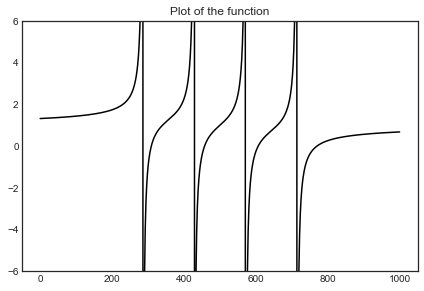

In [49]:
import numpy as np

lm = [1, 2, 3, 4]
M = len(lm)
D = np.array(lm)
a = np.min(lm)
b = np.max(lm)
t = np.linspace(-1, 6, 1000)
u = 0.5 * np.ones(M)
rho = 1
def fun(lam):
    return 1 + rho * np.sum(u**2/(D - lam))
res = [fun(lam) for lam in t]
plt.plot(res, 'k')
plt.ylim([-6, 6])
plt.tight_layout()
plt.title('Plot of the function')

The function has only one root at $[d_i, d_{i+1}]$

We have proved, by the way, the **Cauchy interlacing theorem** (what happens to the eigenvalues under rank-$1$ perturbation)

## How to find the root

A Newton method will fail (draw a picture with a tangent line).

Note that Newton method is just approximation of a function $f(\lambda)$ by a linear function.

Much better approximation is the **hyperbola**:

$$f(\lambda) \approx c_0 + \frac{c_1}{d_i - \lambda} + \frac{c_2}{d_{i+1} - \lambda}.$$

To fit the coefficients, we have to evaluate $f(\lambda)$ and $f'(\lambda)$ in the particular point.

After that, the approximation can be recovered from solving **quadratic equation**




## Important issues

First, stability: This method was abandoned for a long time due to instability of the computation of the eigenvectors.

In the recursion, we need to compute the eigenvectors of the $D + \rho uu^*$ matrix.

The exact expression for the eigenvectors is  just (let us check!)

$$(D - \alpha_i I)^{-1}u,$$ where $\alpha_i$ is the computed root.

## Lowner theorem

The solution is to use a strange **Lowner theorem:**

If $\alpha_i$ and $d_i$ satisfy the **interlacing theorem** 


$$d_n < \alpha_n < \ldots < d_{i+1} < \alpha_{i+1} \ldots$$

Then there exists a vector $\widehat{u}$ such that $\alpha_i$ are exact eigenvalues of the matrix

$$\widehat{D} = D + \widehat{u} \widehat{u}^*.$$

So, you first compute the eigenvalues, then compute $\widehat{u}$ and only then the eigenvectors.

## Divide and conquer and the Fast Multipole Method

In the computations of divide and conquer we have to evaluate the sums of the form

$$f(\lambda) = 1 + \rho \sum_{i=1}^n \frac{|u_i|^2}{(d_i - \lambda)},$$

and have to do it at least for $n$ points. 

- The complexity is then $\mathcal{O}(n^2)$, as for the QR algorithm.

- Can we make it $\mathcal{O}(n \log n)$? 

- The answer is yes, but we have to replace the computations by the approximate ones
by the help of **Fast Multipole Method**.

I will do a short explanation on the whiteboard.

## Few more algorithms

Absolutely different approach is based on the **bisection**.  
(See how it works in detail [here](#auxiliary))

Given a matrix $A$ its inertia is defined as a triple $(\nu, \zeta, \pi)$,  
where $\nu$ is the number of negative, $\zeta$ - zero and $\pi$ - positive eigenvalues. 

If $X$ is non-singular, then 

$$\mathrm{Inertia}(A) = \mathrm{Inertia}(X^* A X)$$

## Bisection via Gaussian elimination

Given $z$ we can do the Gaussian elimination:

$$A - zI = L D L^*,$$

and inertia of the diagonal matrix is trivial to compute.

Thus, if we want to find all the eigenvalues in the interval $a$, $b$

Using inertia, we can easily count the number of eigenvalues in an interval. <br>
Illustration: if $\mathrm{Inertia}(A)=(5,0,2)$ and after shift $\mathrm{Inertia}(A-zI)=(4,0,3)$, $z\in[a,b]$ then we know that $\lambda(A)\in[a,z]$.

## Jacobi method

Recall what a Jacobi (Givens rotations) are:

In a plane they correspond to a $2 \times 2$ orthogonal matrix of the form

$$\begin{pmatrix} \cos \phi & \sin \phi \\ -\sin \phi & \cos \phi \end{pmatrix},$$

and in the $n$-dimensional case we select two variables $i$ and $j$ and rotate.

## Jacobi method (cont.)

The idea of the Jacobi method is to minimize sum of squares of off-diagonal elements:

$$\Gamma(A) = \mathrm{off}( U^* A U), \quad \mathrm{off}^2(X) = \sum_{i \ne j} \left|X_{ij}\right|^2 = \|X \|^2_F - \sum\limits_{i=1}^n x^2_{ii}.$$

by applying succesive Jacobi rotations $U$ to zero off-diagonal elements. 

When the "pivot" is chosen, it is easy to eliminate it. 

The main question is then what is the order of **sweeps** we have to make (i.e. in which order to eliminate).

If we always eliminate the largest off-diagonal elements the method has quadratic convergence.

In practice, a cyclic order (i.e., $(1, 2), (1, 3), \ldots, (2, 3), \ldots$) is used.

## Jacobi method: convergence

To show convergence, we firstly show that 
$$
\text{off}(B) < \text{off}(A),
$$
where $B = U^*AU$.

In this case we use the unitary invariance of Frobenius norm and denote by $p$ and $q$ the indices that is changed after rotation:

$ \Gamma^2(A) = \text{off}^2(B) =  \|B\|^2_F - \sum\limits_{i=1}^n b^2_{ii} = \| A \|^2_F - \sum\limits_{i \neq p, q} b^2_{ii} - (b^2_{pp} + b^2_{qq}) = \| A \|^2_F - \sum\limits_{i \neq p, q} a^2_{ii} - (a^2_{pp} + 2a^2_{pq} + a^2_{qq}) = \| A \|^2_F - \sum\limits_{i =1}^n a^2_{ii} - 2a^2_{pq} = \text{off}^2(A) - 2a^2_{pq} < \text{off}^2(A)$

We show that the ''size'' of off-diagonal elements decreases after Jacobi rotation.

If we always select the largest off-diagonal element $a_{pq} = \gamma$ to eliminate (pivot), then we have

$$
|a_{ij}| \leq \gamma,
$$

thus  

$$
\text{off}(A)^2 \leq 2 N \gamma^2,
$$

where $2N = n(n-1)$ is the number of off-diagonal elements.
Or rewrite this inequality in the form

$$2
\gamma^2 \geq \frac{\text{off}^2(A)}{N}.
$$
Now we use relations $\Gamma^2(A) = \text{off}^2(A) - 2\gamma^2 \leq \text{off}^2(A) - \dfrac{\text{off}^2(A)}{N}$ and get
$$
\Gamma(A) \leq \sqrt{\left(1 - \frac{1}{N}\right)} \text{off}(A).
$$

Aften $K$ steps we have the factor

$$\left(1 - \frac{1}{N}\right)^{\frac{K}{2}} \approx e^{-\frac{1}{2}},$$

i.e. linear convergence. However, the convergence is locally quadratic (given without proof here).

## Jacobi: summary

Jacobi method was the first numerical method for the eigenvalues, proposed in 1846.

- Large constant
- Very accurate (high relative error for small eigenvalues)
- Good parallel capabilities

## Summary for this part
- Many algorithms for the computation of the SEV solution (QR, Divide-and-conquer, bisection, Jacobi)

## Summary of todays lecture

- Algorithms for symmetric eigenvalue problems

## Next lecture
- We start **sparse and/or structured** NLA.

# Questions?